<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/N_N(Gas_turbines)assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gas = pd.read_csv("/content/gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


#EDA

In [ ]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
#Takeing only ambient variables
gas.drop(["AFDP","GTEP","TIT","TAT","CDP","CO","NOX"],axis=1,inplace=True)


In [ ]:
gas.head()#TEY variable is our output

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [ ]:
gas.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [ ]:
gas.duplicated().value_counts()
# there is no duplicates value

False    15039
dtype: int64

In [ ]:
gas.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


Visualization

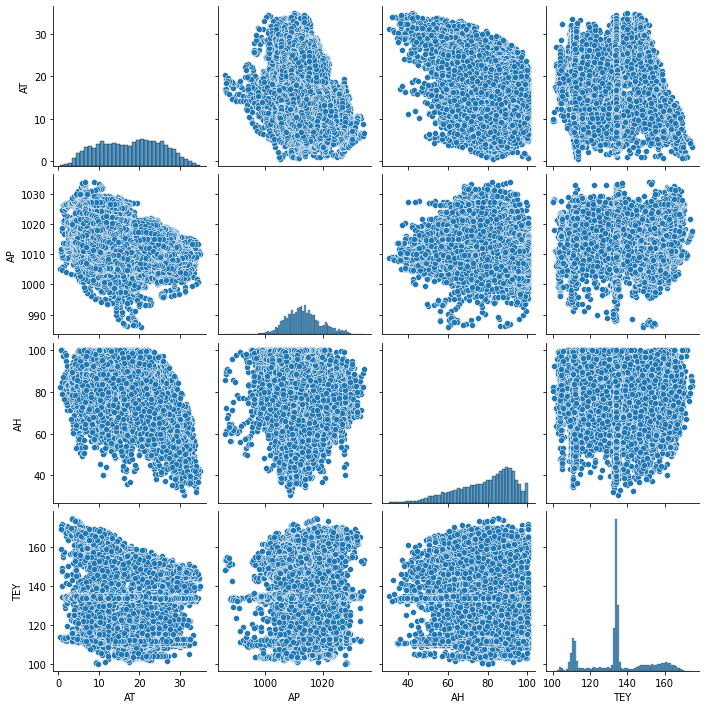

In [ ]:
import seaborn as sns
sns.pairplot(data=gas)

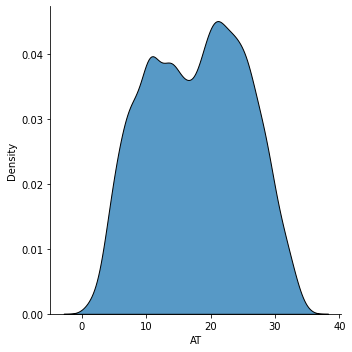

In [ ]:
sns.displot(data=gas["AT"],kind="kde", multiple="stack")

The range is more in AT variable that means it is careing more values in it

In [ ]:
gas["AT"].agg(["var","median","skew","kurtosis"])

var         57.370364
median      18.186000
skew        -0.030710
kurtosis    -0.987597
Name: AT, dtype: float64

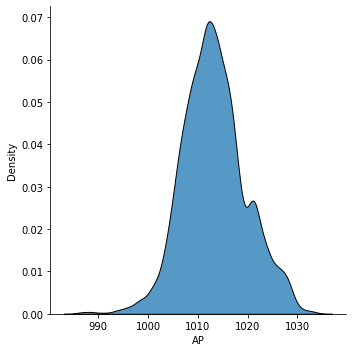

In [ ]:
sns.displot(data=gas["AP"],kind="kde", multiple="stack")

In [ ]:
gas["AP"].agg(["var","median","skew","kurtosis"])

var           41.097847
median      1012.800000
skew           0.107601
kurtosis       0.424070
Name: AP, dtype: float64

In this graph the values are higly dens at range of 1000-1020 which means it's careing more information/ value in it

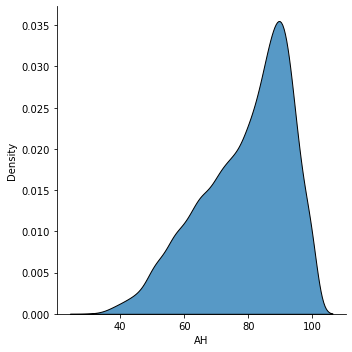

In [ ]:
sns.displot(data=gas["AH"],kind="kde",multiple="stack")

In [ ]:
gas["AH"].agg(["var","median","skew","kurtosis"])

var         190.258964
median       82.266000
skew         -0.681224
kurtosis     -0.282476
Name: AH, dtype: float64

In AH variable graph it is skewed towords negative side and it and highly dens at some where between 85-90 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


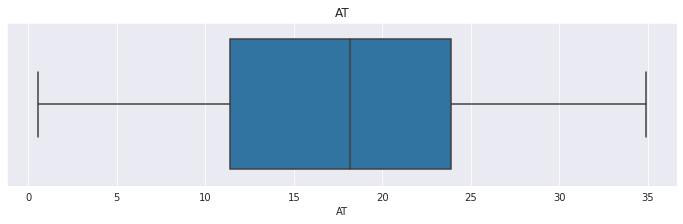

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


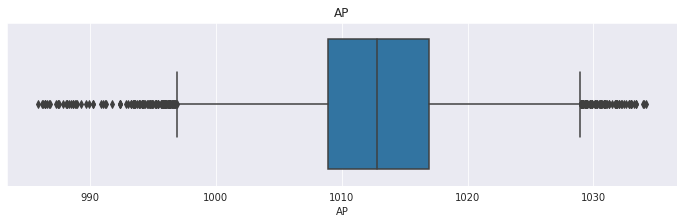

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


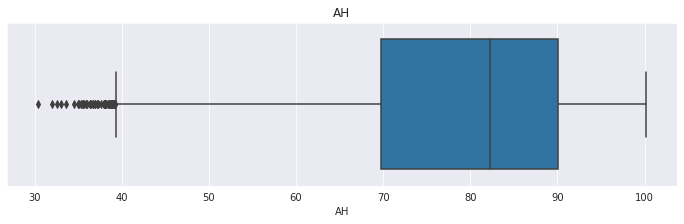

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


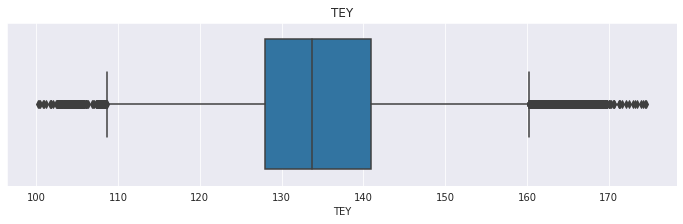

In [ ]:
%matplotlib inline
for i in gas:
  sns.set_style("darkgrid")
  plt.figure(figsize=(12,3))
  sns.boxplot(gas[i])
  plt.title(i)
  plt.show()

Yes there are out liers present in our data

Spliting the data for train test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = gas.iloc[:,:3]
y = gas.iloc[:,3]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
# Reshape the output
y_train = np.reshape(y_train.to_numpy(),(-1,1))
y_test = np.reshape(y_test.to_numpy(), (-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
xtrain = scale.fit_transform(x_train)
ytrain = scale.fit_transform(y_train)

In [ ]:
xtrain.shape

(10527, 3)

#Neural Network model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#creating model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(12, input_dim = 3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [ ]:
# Fitting the model
hist_1 = model.fit(xtrain,ytrain, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
706/706 [==============================] - 3s 3ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1595 - val_loss: 0.0422 - val_mse: 0.0422 - val_mae: 0.1543
Epoch 2/100
706/706 [==============================] - 2s 3ms/step - loss: 0.0421 - mse: 0.0421 - mae: 0.1564 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1578
Epoch 3/100
706/706 [==============================] - 2s 3ms/step - loss: 0.0415 - mse: 0.0415 - mae: 0.1575 - val_loss: 0.0412 - val_mse: 0.0412 - val_mae: 0.1590
Epoch 4/100
706/706 [==============================] - 2s 3ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1578 - val_loss: 0.0409 - val_mse: 0.0409 - val_mae: 0.1574
Epoch 5/100
706/706 [==============================] - 3s 4ms/step - loss: 0.0406 - mse: 0.0406 - mae: 0.1575 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1560
Epoch 6/100
706/706 [==============================] - 2s 3ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1572 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1581
Epoch 7/10

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3)                 0         
                                                                 
 dense_6 (Dense)             (None, 12)                48        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(3, 12) dtype=float32, numpy=
 array([[ 0.94211507,  0.6412314 , -0.29366434,  0.23531927, -0.5907192 ,
          1.0439348 , -0.5515747 , -0.92680526,  0.02398813,  0.142699  ,
         -0.12440646, -0.8327029 ],
        [ 0.6174358 ,  0.05229797,  0.07995179, -0.61364174,  0.31411147,
         -0.15086044, -0.178526  ,  0.46445915, -0.46022445, -0.23394242,
         -0.21425524, -0.2683929 ],
        [-0.16364634,  0.39297786,  0.7283428 ,  0.17812105, -0.1587699 ,
         -0.33845118,  0.8582194 , -0.27782723, -0.11980802, -0.6210768 ,
         -0.34427273,  0.56608605]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(12,) dtype=float32, numpy=
 array([-0.20612444, -0.28306305, -0.30570734,  0.22644268,  0.31950212,
         0.24961928, -0.29500085,  0.5095721 ,  0.        ,  0.        ,
         0.        ,  0.37202847], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(12, 8) dtype=float32, numpy=
 array([[-0.6313322 , -0.8033

In [ ]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

141/141 [==============================] - 0s 2ms/step - loss: 17927.1660 - mse: 17927.1660 - mae: 132.9421
mse: 1792716.60%


In [ ]:
# predicting the model
y_pred = model.predict(x_test)
y_pred

141/141 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
print(hist_1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [ ]:
hist_df = pd.DataFrame(hist_1.history)
hist_df["epoch"] = hist_1.epoch
hist_df

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,0.044694,0.044694,0.159491,0.042204,0.042204,0.154323,0
1,0.042102,0.042102,0.156360,0.041529,0.041529,0.157797,1
2,0.041501,0.041501,0.157538,0.041155,0.041155,0.158953,2
3,0.040977,0.040977,0.157755,0.040910,0.040910,0.157398,3
4,0.040626,0.040626,0.157487,0.040574,0.040574,0.155961,4
...,...,...,...,...,...,...,...
95,0.037994,0.037994,0.152653,0.038184,0.038184,0.154539,95
96,0.037880,0.037880,0.152572,0.038405,0.038405,0.151941,96
97,0.037991,0.037991,0.152697,0.038265,0.038265,0.153512,97
98,0.037978,0.037978,0.152408,0.038327,0.038327,0.155189,98


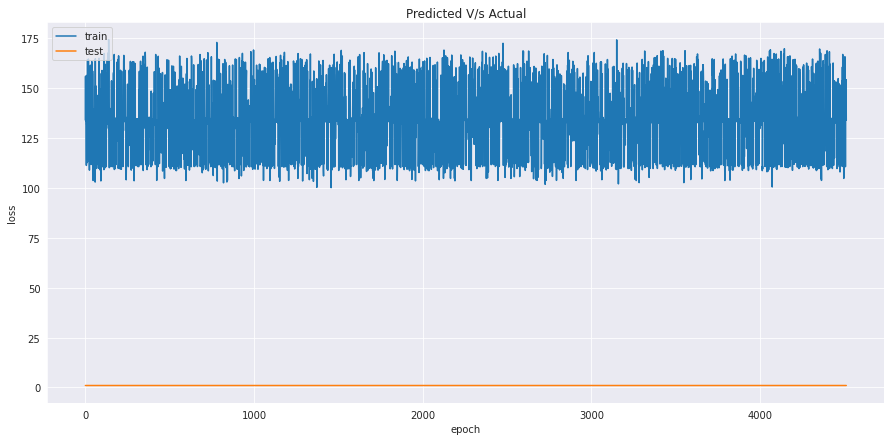

In [ ]:
# Comparison of prediction and actual values
plt.figure(figsize = (15,7))
plt.plot(y_test)
plt.plot(y_pred)
plt.title('Predicted V/s Actual')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

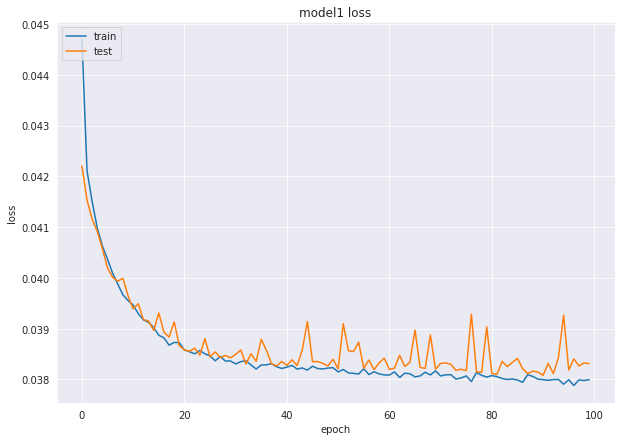

In [ ]:
# summarize history for Loss
plt.figure(figsize = (10,7))
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

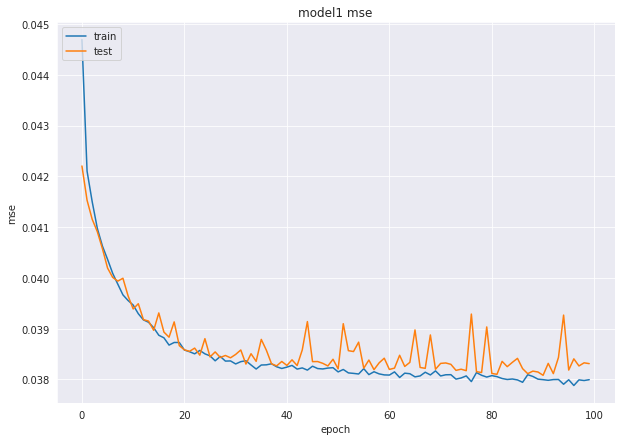

In [ ]:
# _summarizing for mse_
plt.figure(figsize = (10,7))
plt.plot(hist_1.history['mse'])
plt.plot(hist_1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion:- 

_Score of loss and Mean_Squared_error is same_